In [1]:
import sys
import pandas as pd
import os
import nltk
nltk.downloader.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
cur=os.getcwd()
par=os.path.dirname(cur)
sys.path.insert(0,par)

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\abenet\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
#reading the data
news_df=pd.read_csv('C:/Users/abenet/Desktop/data/raw_analyst_ratings.csv')

Obtaining basic statistics for headline

In [3]:
news_df=news_df.drop(['Unnamed: 0'],axis=1)
news_df['headline length']=news_df['headline'].apply(lambda x: len(x.split()))
news_df.head()

,headline,url,publisher,date,stock,headline length
0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A,7
1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A,7
2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A,5
3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A,7
4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A,14


In [4]:
print(f"The mean headline length is {round(news_df['headline length'].mean())} words")

The mean headline length is 11 words


In [5]:
#Top 10 publishers with the most articles
news_df['publisher'].value_counts().head(10)

publisher
Paul Quintaro        228373
Lisa Levin           186979
Benzinga Newsdesk    150484
Charles Gross         96732
Monica Gerson         82380
Eddie Staley          57254
Hal Lindon            49047
ETF Professor         28489
Juan Lopez            28438
Benzinga Staff        28114
Name: count, dtype: int64

In [6]:
#creating the instance of the sentiment analyzer
news_df=news_df[news_df['stock']=='AAPL']
sia=SentimentIntensityAnalyzer()
news_df['sentiment'] = news_df['headline'].apply(lambda x: sia.polarity_scores(text=x)['compound'])
news_df.head()


,headline,url,publisher,date,stock,headline length,sentiment
6680,Tech Stocks And FAANGS Strong Again To Start D...,https://www.benzinga.com/government/20/06/1622...,JJ Kinahan,2020-06-10 11:33:26-04:00,AAPL,13,0.5574
6681,10 Biggest Price Target Changes For Wednesday,https://www.benzinga.com/analyst-ratings/price...,Lisa Levin,2020-06-10 08:14:08-04:00,AAPL,7,0.0000
6682,"Benzinga Pro's Top 5 Stocks To Watch For Wed.,...",https://www.benzinga.com/short-sellers/20/06/1...,Benzinga Newsdesk,2020-06-10 07:53:47-04:00,AAPL,17,0.2023
6683,"Deutsche Bank Maintains Buy on Apple, Raises P...",https://www.benzinga.com/news/20/06/16219873/d...,Benzinga Newsdesk,2020-06-10 07:19:25-04:00,AAPL,11,0.0000
6684,Apple To Let Users Trade In Their Mac Computer...,https://www.benzinga.com/news/20/06/16218697/a...,Neer Varshney,2020-06-10 06:27:11-04:00,AAPL,16,0.3818


<Axes: ylabel='count'>

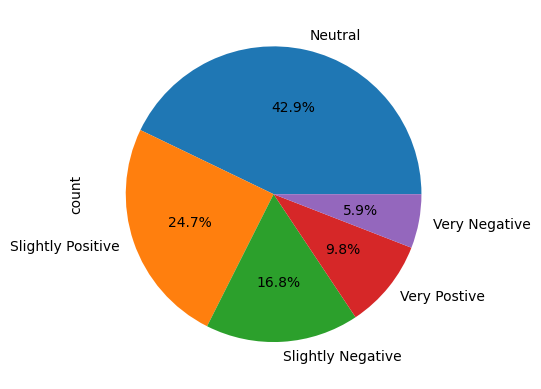

In [7]:
news_df['sentiment_category'] = pd.cut(news_df['sentiment'], bins=[-1, -0.5, -0.0001,0.0001, 0.5, 1], labels=['Very Negative', 'Slightly Negative', 'Neutral', 'Slightly Positive','Very Postive'])
c=news_df['sentiment_category'].value_counts()
c.plot(kind='pie',autopct="%1.1f%%")

<u>Publisher Analysis</u>
* Specifically for the AAPL ticker I analyzed the publisher count 

In [8]:
#Top 10 publishers with the most articles
news_df['publisher'].value_counts().head(10)

publisher
Benzinga Newsdesk    117
Neer Varshney         47
JJ Kinahan            37
Lisa Levin            32
IAM Newswire          25
Charles Gross         25
Benzinga_Newsdesk     22
Vick Meyer            20
Shivdeep Dhaliwal     20
Shanthi Rexaline      13
Name: count, dtype: int64

In [9]:
#Publisher who used email adresses as publisher name
dr=news_df[news_df['publisher'].str.contains('@')]
dr=dr['publisher'].str.split('@',expand=True)
dr.columns=['user','handle']
dr['handle'].value_counts()

handle
benzinga.com    4
Name: count, dtype: int64

In [11]:
news_df['date']=pd.to_datetime(news_df['date'],format='ISO8601')
news_df['day']=news_df['date'].dt.strftime('%Y-%m-%d')
news_df['time']=news_df['date'].dt.time
published_count=news_df['date'].value_counts().reset_index()
published_count=published_count.sort_values(by='count',ascending=False)
published_count.head(10)


,date,count
0,2020-04-30 00:00:00-04:00,36
1,2020-05-01 00:00:00-04:00,28
2,2020-04-27 00:00:00-04:00,16
3,2020-03-11 00:00:00-04:00,14
4,2020-03-27 00:00:00-04:00,12
5,2020-03-25 00:00:00-04:00,12
6,2020-03-17 00:00:00-04:00,12
7,2020-03-13 00:00:00-04:00,11
8,2020-03-16 00:00:00-04:00,11
9,2020-05-27 00:00:00-04:00,10


In [52]:

dr=news_df['sentiment'].groupby(by=news_df['date']).mean().reset_index()
dr['date']=pd.to_datetime(dr['date'],format='mixed',utc=True)
dr['date']=dr['date'].dt.date
dr=pd.DataFrame(dr)
dr.to_csv('C:/Users/abenet/Desktop/data/sentiment.csv')